### Exploratory Data Analysis Using YouTube API from Most Popular Categories


### 1. Introduction

There are many different ways to learn something new in the technology world, some of these ways can be reading a book, taking an online course, or just watching a video in an online platform like YouTube. All these options are valid ways to acquire new knowledge, but the reality is that one of them outstand over the others, and that one is YouTube. Youtube is considered one of the most popular platforms to learn something new, as you can find almost any type content for free. The majority of this content will come directly from millions of users that devode their time for the creation of new videos, where they will share their knowledge with the hope of helping others to solve an issue or task. But not all these videos are about learning, many of them are related to news, entretaitment, music, or just social videos. Based on that, this poject will be exploring how many of the most watched videos have an educational porpurse.

### 2. Objectives

Within this project, we will be exploring the following:
1. Getting to know the YouTube API and how to obtain video data.
2. Analyzing video data and categories to answer the following questions:
    * Does the "Educational" videos are in top ten (10) categories?
    * How many tags are related to a video. 
    * What are the most common tags among these videos?

### 3. Steps of the project

* Obtain raw data via [Youtube API for Most Popular Categories](https://developers.google.com/youtube/v3/docs/videoCategories/list) in the United States using the 'regionCode' parameter.
* Preparition of the data for future analysis.
* Exploratory data analysis.
* Conclusions.

### 4. Dataset

This project was created using the following endpoints from the Google Youtube Data API :

1.  Most Popular Videos by Country.
2.  Video Categories.

Limitations:
The top categories of YouTube will change very often depending on the preferences of their users, meaning that this dataset and the conclusions obtained from it, will be in a point in time.

The dataset is a real-world dataset and suitable for research. However, the selection depends on the type of news (entertainment, art, sports, games, politics, topics, locations, and much more).

### 5. Ethics of data source

The usage of [Youtube API](https://developers.google.com/youtube/v3) endpoints is free with a quota limit of 10,000 results per day for personal use. All details are especify in [YouTube API Services Terms of Service](https://developers.google.com/youtube/terms/api-services-terms-of-service#limitation-of-liability).

### 6. Dataset creation

The first step will be creating an authorization credential (API key) in [Google Developers Console](https://console.cloud.google.com/) to enable the YouTube API access.

In [21]:
# Google/Youtube API 
from googleapiclient.discovery import build
import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors

from IPython.display import JSON
from wordcloud import WordCloud, STOPWORDS
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
api_key = '{Your-API-Key}'
api_service_name = "youtube"
api_version = "v3"
# Get credentials and create an API client
youtube = build( api_service_name, api_version, developerKey=api_key)

The main function will return a dataframe with the 'Top 500 Most Popular Videos in the U.S'. Each page has a limit of fifty (50) items. The results will be limited to 500 items due to the daily limit of requests and to facilitate the visualization of the charts.

In [26]:
def get_all_videos(youtube, country):    
    """
    Return videos stats: publishedAt, channelId, title, description, thumbnails, channelTitle, 
                      tags, categoryId, liveBroadcastContent, defaultLanguage, localized, defaultAudioLanguage
    """
    request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        chart="mostPopular",
        regionCode=country,
        maxResults = 50       
    )
    
    response = request.execute()
    
    all_videos = []
    
    for i in range(len(response['items'])):
        all_videos.append(response['items'][i]['snippet'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    pages = 1
    while more_pages and pages<10:
        pages = pages+1
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.videos().list(
                part="snippet,contentDetails,statistics",
                chart="mostPopular",
                regionCode="US",
                maxResults = 50       
            )

            response = request.execute()            
  
            for i in range(len(response['items'])):
                all_videos.append(response['items'][i]['snippet'])
            
            next_page_token = response.get('nextPageToken')
    
    
    return(pd.DataFrame(all_videos))

In [24]:
videos = get_all_videos(youtube, "US")
videos

,publishedAt,channelId,title,description,thumbnails,channelTitle,tags,categoryId,liveBroadcastContent,defaultLanguage,localized,defaultAudioLanguage
0,2022-10-04T00:30:15Z,UCpi8TJfiA4lKGkaXs__YdBA,what happened.,,{'default': {'url': 'https://i.ytimg.com/vi/t6...,The Try Guys,"[try guys, keith, ned, zach, eugene, habersber...",23,none,en,"{'title': 'what happened.', 'description': ''}",en
1,2022-10-03T01:00:13Z,UCTkXRDQl0luXxVQrRQvWS6w,"hi, I'm Dream.","hi, I'm Dream, and this is what I look like.\n...",{'default': {'url': 'https://i.ytimg.com/vi/Ct...,Dream,"[minecraft, dream, dream minecraft, face revea...",20,none,NaN,"{'title': 'hi, I'm Dream.', 'description': 'hi...",en
2,2022-10-04T01:17:06Z,UC1DTYW241WD64ah5BFWn4JA,Where Animals' Scientific Names Come From,sup\n____________________\nCheck out my other ...,{'default': {'url': 'https://i.ytimg.com/vi/XK...,Sam O'Nella Academy,NaN,24,none,NaN,{'title': 'Where Animals' Scientific Names Com...,en-US
3,2022-10-04T04:45:09Z,UCA2tt9GSU2sl8rAqjlLR3mQ,I Met Dream In Real Life,I met Dream in real life finally... We've been...,{'default': {'url': 'https://i.ytimg.com/vi/i7...,GeorgeNotFound,"[I Met Dream In Real Life, GeorgeNotFound, Dre...",24,none,NaN,"{'title': 'I Met Dream In Real Life', 'descrip...",en
4,2022-10-03T13:00:01Z,UCvC4D8onUfXzvjTOM-dBfEA,Marvel Studios’ Black Panther: Wakanda Forever...,“Show them who we are.” Watch the brand-new tr...,{'default': {'url': 'https://i.ytimg.com/vi/_Z...,Marvel Entertainment,"[marvel, comics]",24,none,NaN,{'title': 'Marvel Studios’ Black Panther: Waka...,en
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2022-10-02T18:22:02Z,UCnnrLDosqnpRPQ_TH3uXnnQ,Complete BASE SET in 24 Hours or else... @Poke...,I was challenged by @PokeRev to complete a bin...,{'default': {'url': 'https://i.ytimg.com/vi/tX...,Deep Pocket Monster,"[pokemon, pokemon cards, pokemon tcg, pat flyn...",24,none,en,{'title': 'Complete BASE SET in 24 Hours or el...,en-US
496,2022-10-02T14:00:23Z,UC0QHWhjbe5fGJEPz3sVb6nw,TikToks To Never Show Your Doctor,Keep exploring at https://brilliant.org/Doctor...,{'default': {'url': 'https://i.ytimg.com/vi/W4...,Doctor Mike,"[doctor mike, dr mike, drmike, dr. mike, mikha...",27,none,en,"{'title': 'TikToks To Never Show Your Doctor',...",en
497,2022-10-02T12:14:43Z,UCD3KREyo3IqCLBC-4khGgIw,Hurricane Ian- Ft. Myers Beach Florida- Tsuna...,For licensing inquiries www.wxchasing.com/cont...,{'default': {'url': 'https://i.ytimg.com/vi/OH...,WXChasing,"[Hurricane, Ian, HurricaneIan, Storm Surge, Ca...",25,none,en-US,{'title': 'Hurricane Ian- Ft. Myers Beach Flor...,en-US
498,2022-10-02T16:08:14Z,UCj74rJ9Lgl3WTngq675wxKg,ratios are a nightmare,Get 20% off + FREE International Shipping with...,{'default': {'url': 'https://i.ytimg.com/vi/eL...,Noodle,NaN,1,none,en,"{'title': 'ratios are a nightmare', 'descripti...",en


YouTube use a channel to show the most watched videos and in this function we will receive a list of the video categories associated to that channel ([The Youtube Channel](https://www.youtube.com/channel/UCBR8-60-B28hp2BmDPdntcQ)). This channel will cover the videos, playlists, and the most populars communities. The 'Education' category will be our focus from this list.

In [8]:
def get_categories_ids(youtube):    

    """
    Returns: dataframe with id, title or category, and channelId
    """
    request = youtube.videoCategories().list(
        part="snippet",
        regionCode="US"
    )
    response = request.execute()
    all_cats_info = []
    for i in response['items']:
        stats_to_keep = {'snippet': ['title', 'assignable', 'channelId']}
        cat_info = {}
        cat_info['id'] = i['id']
        cat_info['snippet'] = i['snippet']
        try:
             all_cats_info.append( cat_info['snippet'])
        except:
             all_cats_info=None

    return(pd.DataFrame(all_cats_info)) 

In [9]:
categories_ids = get_categories_ids(youtube)
categories_ids

,title,assignable,channelId
0,Film & Animation,True,UCBR8-60-B28hp2BmDPdntcQ
1,Autos & Vehicles,True,UCBR8-60-B28hp2BmDPdntcQ
2,Music,True,UCBR8-60-B28hp2BmDPdntcQ
3,Pets & Animals,True,UCBR8-60-B28hp2BmDPdntcQ
4,Sports,True,UCBR8-60-B28hp2BmDPdntcQ
5,Short Movies,False,UCBR8-60-B28hp2BmDPdntcQ
6,Travel & Events,True,UCBR8-60-B28hp2BmDPdntcQ
7,Gaming,True,UCBR8-60-B28hp2BmDPdntcQ
8,Videoblogging,False,UCBR8-60-B28hp2BmDPdntcQ
9,People & Blogs,True,UCBR8-60-B28hp2BmDPdntcQ


The next step will be matching the videos with the categories using the 'id' of the categories and reducing the information to only the fields needed like channel, category, location, and tags. The 'location' response will come as a dictionary with two (2) keys: title and description, unfortunately the real location will not be included in the response.

In [6]:
def get_match_videos(categories_ids, videos):    
    
    """
    Return: dataframe with channelId, channelTitle, title, categoryId, location, tags
    """
    
    id_videos = []

    for index, row in videos.iterrows():        
            for j in categories_ids.iterrows():
                if int(row['categoryId'])==j[0]:  
                    data = {'channelId': row['channelId'],
                             'channelTitle': row['channelTitle'],
                             'title': j[1]['title'],
                             'categoryId': int(row['categoryId']),
                             'location': row['localized'],
                             'tags': row['tags']
                    }
                    id_videos.append(data)
                    
    return(pd.DataFrame(id_videos))

In [10]:
videos_data = get_match_videos(categories_ids, videos)
videos_data

,channelId,channelTitle,title,categoryId,location,tags
0,UCpi8TJfiA4lKGkaXs__YdBA,The Try Guys,Drama,23,"{'title': 'what happened.', 'description': ''}","[try guys, keith, ned, zach, eugene, habersber..."
1,UCTkXRDQl0luXxVQrRQvWS6w,Dream,Classics,20,"{'title': 'hi, I'm Dream.', 'description': 'hi...","[minecraft, dream, dream minecraft, face revea..."
2,UCvC4D8onUfXzvjTOM-dBfEA,Marvel Entertainment,Family,24,{'title': 'Marvel Studios’ Black Panther: Waka...,"[marvel, comics]"
3,UCA2tt9GSU2sl8rAqjlLR3mQ,GeorgeNotFound,Family,24,"{'title': 'I Met Dream In Real Life', 'descrip...","[I Met Dream In Real Life, GeorgeNotFound, Dre..."
4,UCskGDClmh-KvMk9tFxCf0Jw,Montana & Ryan,Documentary,22,"{'title': 'Montana has a tumor in her head', '...","[Montana and ryan, Ryan and Montana, boyfriend..."
...,...,...,...,...,...,...
545,UCNAf1k0yIjyGu3k9BwAg3lg,Sky Sports Premier League,Family,24,"{'title': '""United have DISRESPECTED Ronaldo!""...","[sky sports, premier league, Football League, ..."
546,UCoYfzC2zMlc9M-Odgaf6OSg,KendrickLamarVEVO,Comedy,10,{'title': 'Kendrick Lamar - Rich Spirit + N95 ...,"[Kendrick lamar, rich spirit, N95, snl, Saturd..."
547,UCKMugoa0uHpjUuq14yOpagw,Laura Lee,Horror,26,"{'title': 'whats going on with Eryn.....', 'de...","[LauraLee, get ready with me, grwm, get ready ..."
548,UC_QeMXca1hMnJF8wVF_pHHw,AntlerboyLIVE,Classics,20,{'title': 'Pokémon Moon Hardcore Nuzlocke - Ra...,NaN


In [31]:
loc = pd.DataFrame(videos_data['location'])

Now, we need some stats from the categories. We are going to create a list with the number of videos for each category and we will show the results using a column chart. The top three (3) categories are "Family", "Movies", and "Classics". The "Education" category will not appear in any of the videos.

In [11]:
# Convert to numeric columns
videos_data['categoryId'] = videos_data['categoryId'].astype(int)
videos_data
#x = videos_data.groupby('title').size().to_frame('count')
data = videos_data.groupby('title').size().reset_index(name='count')
data

,title,count
0,Autos & Vehicles,44
1,Classics,88
2,Comedy,33
3,Documentary,22
4,Drama,44
5,Family,154
6,Foreign,22
7,Horror,33
8,Movies,88
9,Music,11


### 7. Exploratory analysis

For the analysis, we need to prepare the data, clean it, and generate some charts. First, we will create a column chart to visualize the list of categories.

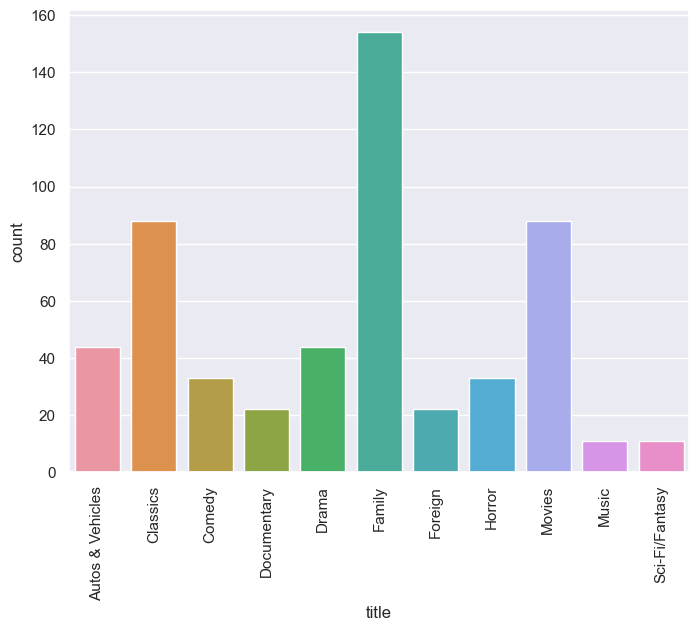

In [12]:
sns.set(rc={'figure.figsize':(8,6)})
graph_bar = sns.barplot(x=data['title'], y=data['count'], data=data.sort_values('title', ascending=True))
plot = graph_bar.set_xticklabels(graph_bar.get_xticklabels(),rotation = 90)

In the previous chart, we worked with the categories and we noticed that each video is related to one (1) category, which means, 'Category' field is not null. But, it will be some 'nulls' or 'NaN' values in the 'Tags' field. For those cases, the solution will be to delete them.

In [13]:
videos_data.isnull().any()

channelId       False
channelTitle    False
title           False
categoryId      False
location        False
tags             True
dtype: bool

In [14]:
tags_list = videos_data['tags'].dropna()
tags_list

0      [try guys, keith, ned, zach, eugene, habersber...
1      [minecraft, dream, dream minecraft, face revea...
2                                       [marvel, comics]
3      [I Met Dream In Real Life, GeorgeNotFound, Dre...
4      [Montana and ryan, Ryan and Montana, boyfriend...
                             ...                        
543    [AntDude, Pac Man, Pac Man World, Pac Man Worl...
545    [sky sports, premier league, Football League, ...
546    [Kendrick lamar, rich spirit, N95, snl, Saturd...
547    [LauraLee, get ready with me, grwm, get ready ...
549    [Kendrick lamar, sampha, father time, snl, Sat...
Name: tags, Length: 451, dtype: object

Now, we have a list of tags for each video and we must convert it into a dataframe to find the 'Most Popular Tags'. The result will be around 8381 tags.

In [15]:
def get_list_videos(tags_list):    
    
    tags = []
    for row in tags_list:     
        for tag in row:
            tags.append(tag)
    
    return(pd.DataFrame(tags))

In [16]:
tags_df = get_list_videos(tags_list)
tags_df

,0
0,try guys
1,keith
2,ned
3,zach
4,eugene
...,...
8377,Kendrick lamar
8378,sampha
8379,father time
8380,snl


As we are interested to see tags or words, the best option is to use the chart 'Word cloud'. The 'Stopwords' library will be very helpful in this step for cleaning up this chart, by removing some words like pronouns and prepositions that are not relevant to the research.

In [17]:
def plot_cloud(tags_df):
    #Convert df to list, then in string
    all_words = list([a for b in tags_df.values.tolist() for a in b])
    all_words_str = ' '.join(all_words) 
    #all_words_str
    
    #Use STOPWORDS base for delete of the string
    stopwords = STOPWORDS
    
    wc = WordCloud(
        background_color='salmon',
        colormap='Pastel1',
        stopwords=stopwords,
        height = 1000,
        width = 2000
    ).generate(all_words_str)
    plt.imshow(wc) 
    plt.axis("off")  
    wc.to_file('wordcloud_output.png')


The first test was on 10/02/2022 with the following tags: 'Man City', 'Manchester United', 'Nyquil chicken', 'premier league', 'Sky sports', 'drinking game', and 'Minecraft day'.
The second test was on 10/04/2022 with the next tags: 'Pac Man', 'Black Panther', 'Pokemon card', and 'c8 z06'. There are some tags repeated in the both tests.
These results are not related to education. So, we can try to find other words like: school, university, knowledge, teaching, training, tuition, instruction, pedagogy, guidance, improvement, or tutorial. Unfortunately, none of those educational words appeared on the charts.

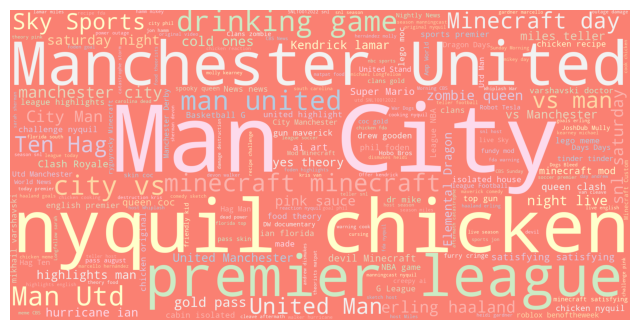

In [16]:
plot_cloud(tags_df) #10/02/2022

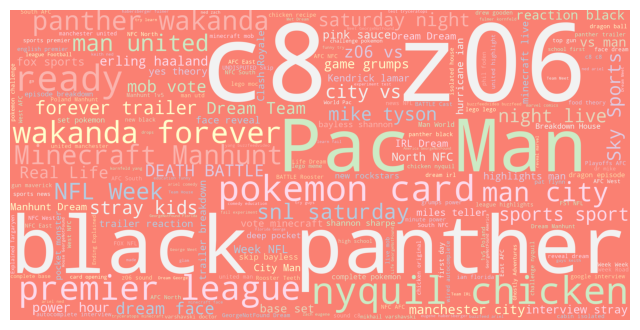

In [18]:
plot_cloud(tags_df) #10/04/2022

### 8. Conclusions

In this exploratory data research we found:
* Youtube has a lot of content for teaching and learning skills but, people in the United State prefered to see other kinds of content.
* The result of this research does not confirm that YouTube is one of the best places for learning, for the contrary, people like to see content related to family and movies.
* YouTube topics are very changing, as each day people with watch different videos related to the trending topics of the day.
* The video 'titles' field contains very similar words to the 'tags' field.
* The categories 'Film & Animation', 'Trailers', 'Shows', 'Shorts', 'Anime/Animation', 'Entertainment', and 'Short movies' doesn't appear in 'Top 10 categories' but are related with the second most popular category "Movie". Based on that we can say that people use the word 'Movie' as they primary tag.


An idea for future research could be to obtain data from one (1) week and compare it to other viewers' preferences in a different country.